# WeatherPy
----

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/Cities_Weather_Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Base URL
b_url="http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+ "&units=imperial&q="

# Set up lists for response
cities_found=[]
lat=[]
lng=[]
temp=[]
hum=[]
cloud=[]
wind=[]
country=[]
date=[]

print("Beginning Data Retrieval")
print("-----------------------------")

url=b_url+cities[0]
response=requests.get(url).json()

for each_city in cities:
    ind=cities.index(each_city)+1
    url=b_url+each_city
    response=requests.get(url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(each_city)
        print(f"Processing city #{ind}: {each_city}")
    except:
        print(f"City #{ind} Not Found, Skipped")

Beginning Data Retrieval
-----------------------------
Processing city #1: busselton
Processing city #2: yellowknife
Processing city #3: guilin
Processing city #4: fare
Processing city #5: saskylakh
Processing city #6: pevek
Processing city #7: porto novo
Processing city #8: bethel
Processing city #9: callaway
Processing city #10: ati
Processing city #11: thinadhoo
Processing city #12: kuala pilah
City #13 Not Found, Skipped
Processing city #14: hilo
Processing city #15: miri
City #16 Not Found, Skipped
Processing city #17: airai
Processing city #18: belmonte
Processing city #19: barrow
Processing city #20: guerrero negro
Processing city #21: mahebourg
City #22 Not Found, Skipped
Processing city #23: san carlos de bariloche
Processing city #24: beppu
Processing city #25: avarua
Processing city #26: la ronge
Processing city #27: albany
Processing city #28: arkhangelskoye
Processing city #29: narsaq
Processing city #30: ponta do sol
Processing city #31: pisco
Processing city #32: bredasd

Processing city #266: mengcheng
Processing city #267: lorengau
Processing city #268: tessalit
Processing city #269: dakoro
City #270 Not Found, Skipped
Processing city #271: keflavik
Processing city #272: lypova dolyna
Processing city #273: springfield
Processing city #274: ulladulla
Processing city #275: ola
Processing city #276: camp verde
Processing city #277: luderitz
Processing city #278: montepuez
Processing city #279: sisimiut
City #280 Not Found, Skipped
Processing city #281: den helder
Processing city #282: sembakung
Processing city #283: ngunguru
Processing city #284: aykhal
Processing city #285: fortuna
Processing city #286: furano
Processing city #287: carutapera
Processing city #288: areosa
Processing city #289: krasnokamensk
Processing city #290: bonfim
Processing city #291: correntina
Processing city #292: kochi
City #293 Not Found, Skipped
Processing city #294: sioux lookout
Processing city #295: nisia floresta
Processing city #296: deputatskiy
Processing city #297: wan

Processing city #531: vestmanna
Processing city #532: carlagan
Processing city #533: bathsheba
Processing city #534: wajir
Processing city #535: huarmey
Processing city #536: praia
Processing city #537: sorland
Processing city #538: portsmouth
Processing city #539: baykit
City #540 Not Found, Skipped
Processing city #541: urengoy
City #542 Not Found, Skipped
Processing city #543: liepaja
Processing city #544: marsa matruh
Processing city #545: sola
Processing city #546: byron bay
City #547 Not Found, Skipped
Processing city #548: abu samrah
Processing city #549: spearfish
Processing city #550: kudymkar
Processing city #551: kloulklubed
Processing city #552: murray bridge
Processing city #553: bara
Processing city #554: shache
Processing city #555: frontera
Processing city #556: beinamar
Processing city #557: san cristobal
City #558 Not Found, Skipped
Processing city #559: yar-sale
Processing city #560: merauke
Processing city #561: nouakchott
Processing city #562: pochutla
Processing c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    "City": cities_found,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country":country,
    "Date":date
}
# Convert to DataFrame and output to CSV file
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,64.04,71,1,25.17,AU,1627264765
1,yellowknife,62.4560,-114.3525,60.30,49,51,8.99,CA,1627264813
2,guilin,25.2819,110.2864,87.96,63,2,2.30,CN,1627264813
3,fare,-16.7000,-151.0167,77.79,67,5,6.35,PF,1627264813
4,saskylakh,71.9167,114.0833,59.65,56,89,16.37,RU,1627264814
...,...,...,...,...,...,...,...,...,...
546,fort saint james,54.4333,-124.2500,62.49,61,100,1.23,CA,1627264939
547,acapulco,16.8634,-99.8901,81.99,85,70,9.44,MX,1627264939
548,arroio grande,-32.2375,-53.0869,63.27,89,39,6.78,BR,1627264940
549,kruisfontein,-34.0033,24.7314,54.59,34,100,11.59,ZA,1627264940


In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.068607,16.720414,68.854065,70.473684,56.943739,7.639710,1.627265e+09
std,33.315454,89.699362,13.633156,19.477510,40.513685,5.284383,8.653993e+01
min,-54.800000,-179.166700,31.750000,7.000000,0.000000,0.000000,1.627264e+09
25%,-5.496950,-59.733350,59.100000,61.000000,11.000000,3.480000,1.627265e+09
50%,24.783300,23.686600,70.360000,74.000000,75.000000,6.350000,1.627265e+09
75%,50.340700,94.981550,79.555000,85.000000,98.000000,10.370000,1.627265e+09
max,78.218600,178.416700,101.640000,100.000000,100.000000,28.720000,1.627265e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# if weather_data["Humidity"].max()>100:
    

Int64Index([], dtype='int64')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

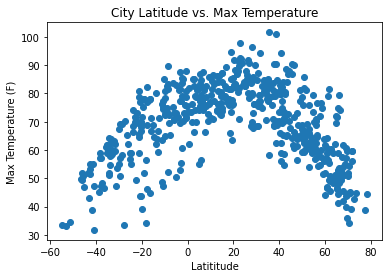

In [17]:
xvals=weather_data['Lat']
yvals=weather_data['Max Temp']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latititude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/LatTemp.png")

plt.show()

## Latitude vs. Humidity Plot

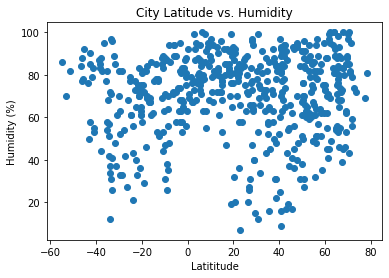

In [18]:
xvals=weather_data['Lat']
yvals=weather_data['Humidity']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latititude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/LatHumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

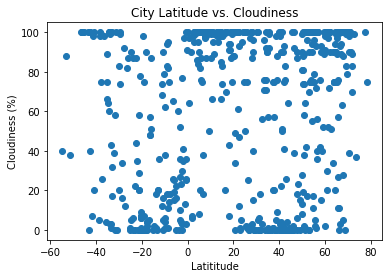

In [19]:
xvals=weather_data['Lat']
yvals=weather_data['Cloudiness']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latititude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/LatCloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

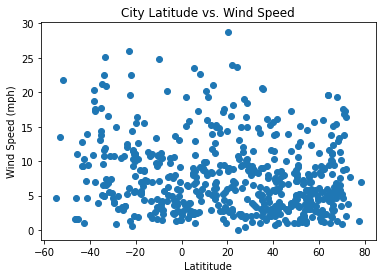

In [20]:
xvals=weather_data['Lat']
yvals=weather_data['Wind Speed']
plt.scatter(xvals,yvals)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latititude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/LatWind.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


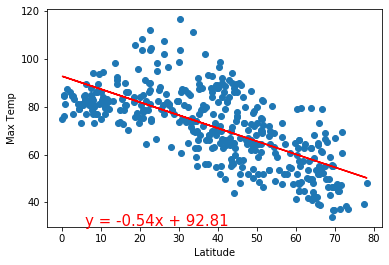

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


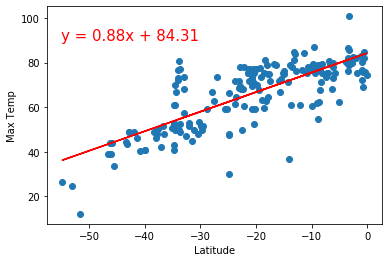

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


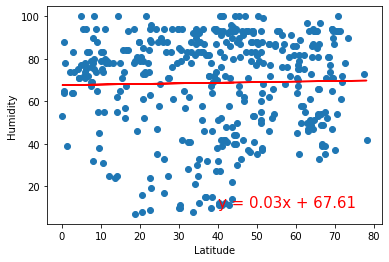

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


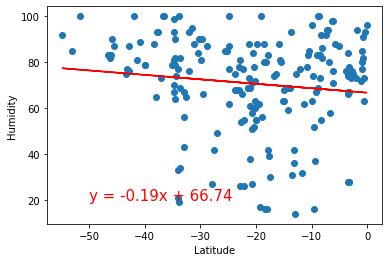

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


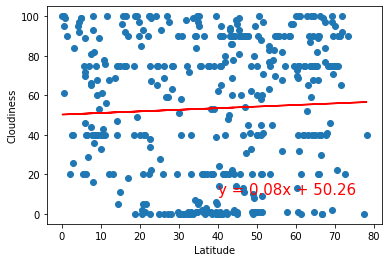

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


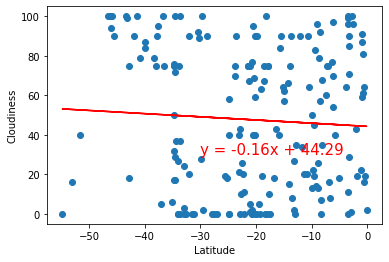

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


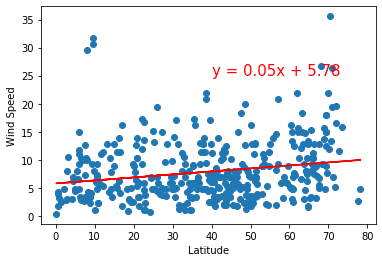

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


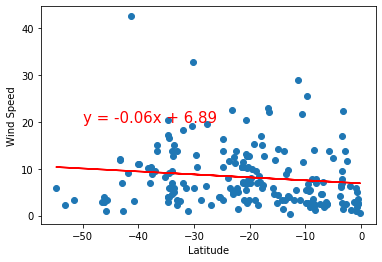